# 3 Importing libraries and datasets

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import dataframes
path= r"C:\Users\sosia\12-2024 Instacart Basket Analysis"

In [6]:
customers = pd.read_pickle(r'C:\Users\sosia\12-2024 Instacart Basket Analysis\02 Data\Prepared Data\customers_cleaned.pkl')

In [12]:
ords_prods_merge = pd.read_pickle(r'C:\Users\sosia\12-2024 Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_merge48.pkl')

In [8]:
customers.head()

,user_id,first_name,last_name,Gender,state,age,signup_date,num_dependents,family_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374


# 2

# Bar Chart

<Axes: xlabel='order_dow'>

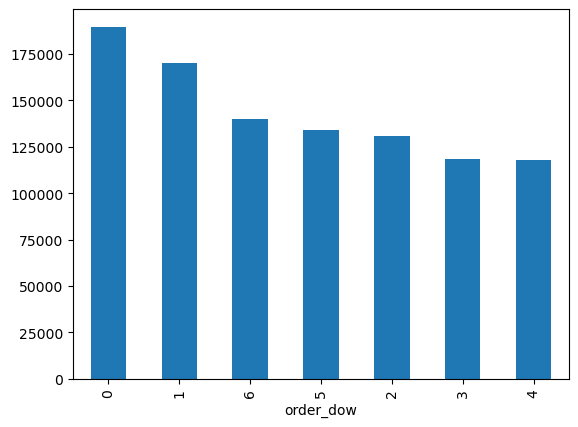

In [14]:
ords_prods_merge['order_dow'].value_counts().plot.bar()

# Histogramm

<Axes: ylabel='Frequency'>

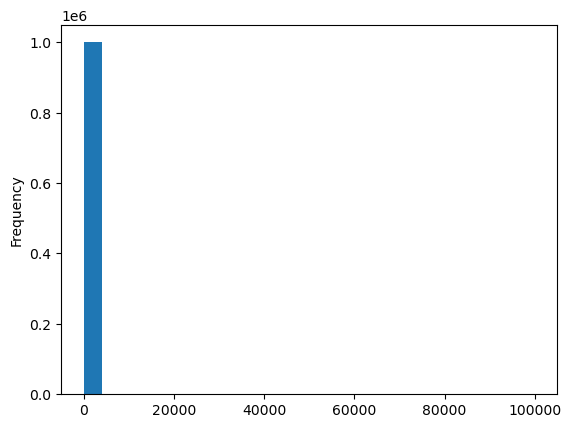

In [16]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

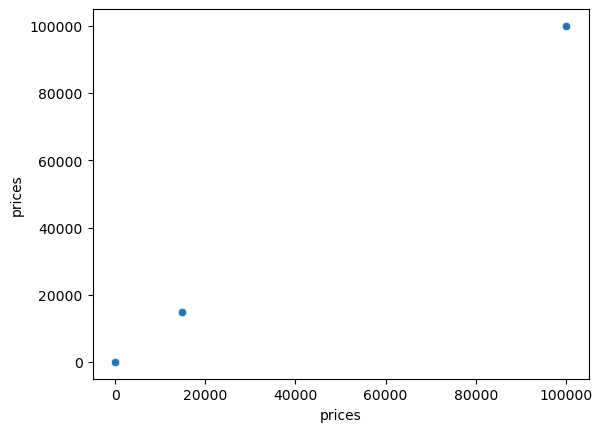

In [18]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [19]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,prices,busiest_day,busiests_days,busiest_period_of_day,max_order,loyalty_flag,total_orders,avg_price_per_user,spending_flag,order_frequency_flag
1576,1576,171,912404,17,prior,12,2,14,5.0,21553,...,14900.0,Regularly busy,Regularly busy,Most orders,40,Regular Customer,40,108.648299,High spender,Frequent customer
1638,1638,181,603376,17,prior,22,6,16,4.0,21553,...,14900.0,Regularly busy,Regularly busy,Most orders,40,Regular Customer,40,108.648299,High spender,Frequent customer
16522,16534,1944,3264360,135,prior,2,2,21,13.0,21553,...,14900.0,Regularly busy,Regularly busy,Average orders,4,New Customer,4,1154.792308,High spender,Regular customer
16528,16540,1945,892534,135,prior,3,0,8,12.0,21553,...,14900.0,Busiest day,Busiest days,Average orders,4,New Customer,4,1154.792308,High spender,Regular customer
53672,53711,5708,229704,342,prior,8,1,19,30.0,21553,...,14900.0,Regularly busy,Busiest days,Average orders,16,Regular Customer,16,114.426619,High spender,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958974,959870,102658,840159,6217,prior,13,1,11,15.0,21553,...,14900.0,Regularly busy,Busiest days,Most orders,23,Regular Customer,23,391.192949,High spender,Regular customer
959020,959916,102665,1235750,6217,prior,20,5,9,11.0,21553,...,14900.0,Regularly busy,Regularly busy,Average orders,23,Regular Customer,23,391.192949,High spender,Regular customer
960274,961170,102737,40712,6221,prior,5,0,15,8.0,21553,...,14900.0,Busiest day,Busiest days,Most orders,15,Regular Customer,15,163.051832,High spender,Regular customer
960348,961244,102742,2567369,6221,prior,10,2,17,17.0,21553,...,14900.0,Regularly busy,Regularly busy,Most orders,15,Regular Customer,15,163.051832,High spender,Regular customer


In [22]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [24]:
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

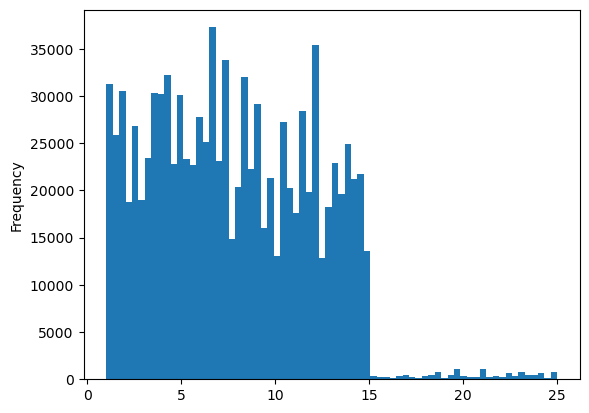

In [26]:
ords_prods_merge['prices'].plot.hist(bins = 70)

# Line chart

In [34]:
np.random.seed(4)

In [36]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [38]:
big = ords_prods_merge[dev]

In [40]:
small = ords_prods_merge[~dev]

In [42]:
len(ords_prods_merge)

1000000

In [44]:
len(big)+len(small)

1000000

In [46]:
df_2 = small[['order_dow','prices']]

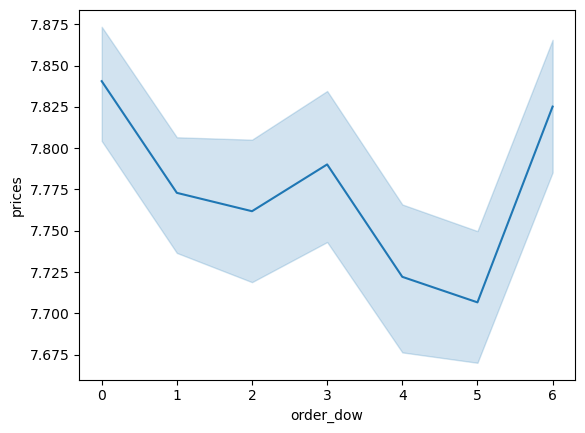

In [48]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

# 3

<Axes: ylabel='Frequency'>

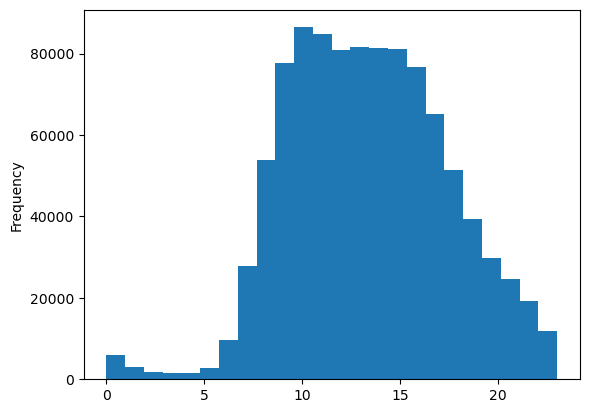

In [55]:
ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

# The histogram displays the frequency of orders placed at different hours of the day. Based on the visualization:

The highest number of orders occurs between 10 AM and 3 PM, indicating peak shopping hours.
There is a gradual increase in orders from early morning (around 5 AM) until late morning.
The number of orders starts to decline after 4 PM and continues decreasing towards late-night hours.
Few orders occur between midnight and early morning (0 AM - 6 AM), which makes sense as most people are not shopping at those times.
Business Implications:
Instacart can optimize staffing and delivery resources during peak order hours.
Marketing promotions could be more effective if targeted at mid-morning to early afternoon.

# 4

<Axes: xlabel='loyalty_flag'>

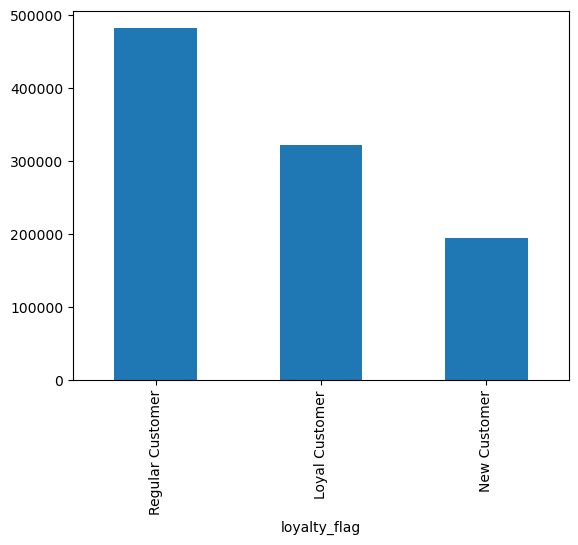

In [62]:
ords_prods_merge['loyalty_flag'].value_counts().plot.bar()


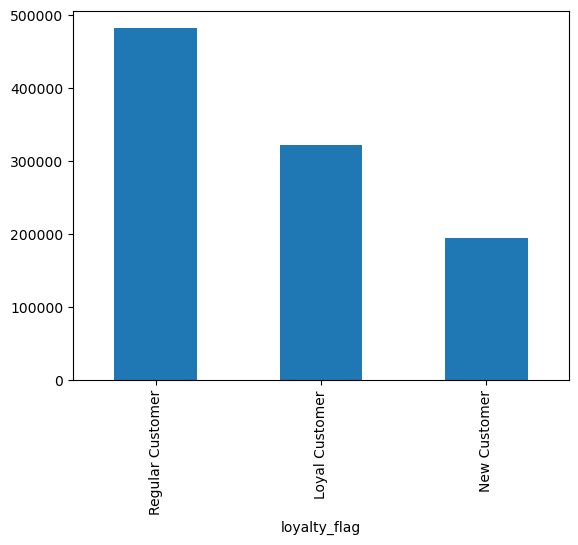

In [131]:
bar = ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

# 5

In [69]:
np.random.seed(4)

In [71]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [73]:
# Create two subsets: 70% (big) and 30% (small)
big = ords_prods_merge[dev]

In [74]:
small = ords_prods_merge[~dev]

In [77]:
# Select only the necessary columns from the small subset
df_2 = small[['order_hour_of_day', 'prices']]

In [79]:
# Group by hour of the day and calculate the mean price
hourly_prices = df_2.groupby('order_hour_of_day')['prices'].mean()

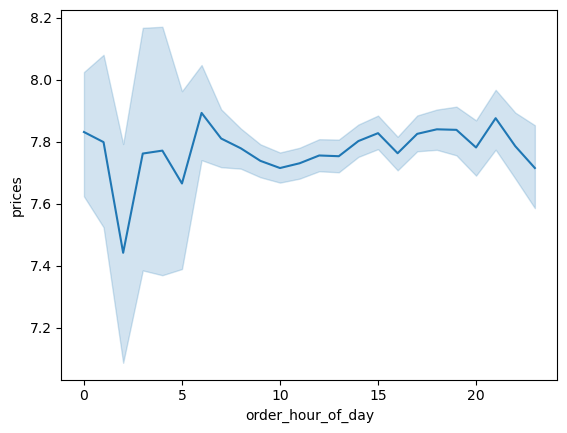

In [81]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

# 6

In [92]:
customers.head()

,user_id,first_name,last_name,Gender,state,age,signup_date,num_dependents,family_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374


In [94]:
dev = np.random.rand(len(customers)) <= 0.7

In [96]:
big = customers[dev]

In [98]:
small = customers[~dev]

In [100]:
df_dependents = small[['age', 'num_dependents']]

In [102]:
average_dependents_by_age = df_dependents.groupby('age')['num_dependents'].mean()

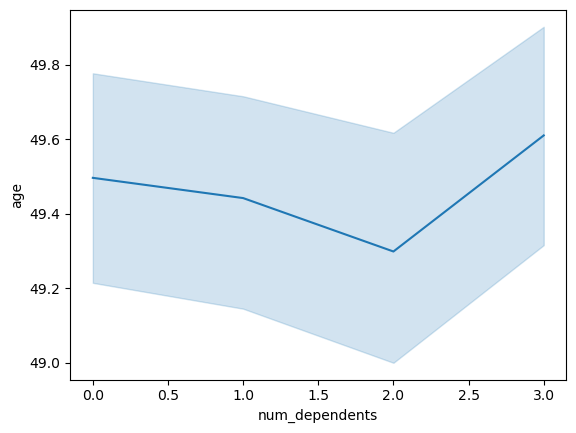

In [106]:
line = sns.lineplot(data = df_dependents, x = 'num_dependents',y = 'age')

In [108]:
# The line chart illustrates the relationship between the number of dependents a customer has and their age.  The y-axis represents age, while the x-axis represents the number of dependents.

# The chart suggests a positive correlation between the number of dependents and age, particularly within the range of 0 to 2 dependents.  
# Age appears to increase as the number of dependents rises from 0 to 2. 
# However, beyond two dependents, the trend becomes less clear. 
# There's an upward movement in age when the number of dependents is 3, but this could be due to limited data points at this level or other 
# influencing factors not captured in this analysis.

# 7 Scatterplot

<Axes: xlabel='age', ylabel='income'>

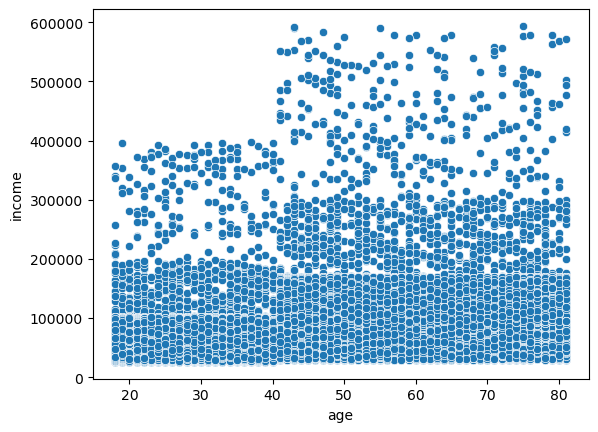

In [115]:
sns.scatterplot(x = 'age', y = 'income',data = customers)

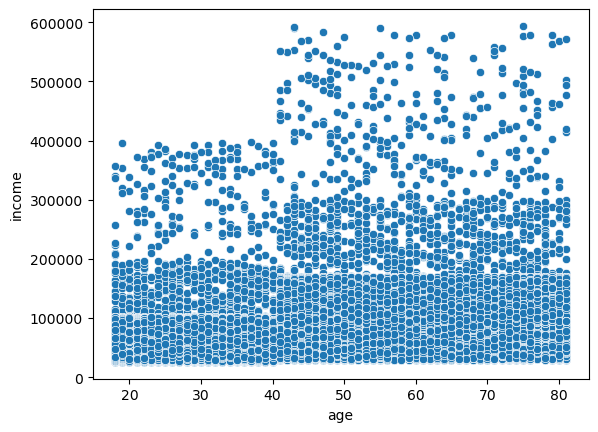

In [127]:
scat = sns.scatterplot(x = 'age', y = 'income',data = customers)

# The scatterplot above visualizes the relationship between customer age (x-axis) and income (y-axis). Each point on the graph represents an individual customer, with their position determined by their corresponding age and income values.
# The data reveals distinct income clusters or bands. A significant portion of customers appear to have incomes below 200,000, forming a dense horizontal band. Another cluster is noticeable around the 400,000-600,000 income range, particularly for ages 40 and above.
# Customers are distributed across a wide range of ages, although there might be a slightly higher concentration in the 40-60 age bracket.
# There are a few potential outliers, particularly customers with very high incomes (above 600,000). These could represent exceptional cases or data anomalies.




In [117]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_9.png'))

In [129]:
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_9.png'))

In [133]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_9.png'))